# 3x2 Time evolution plots Kpc scale

In [1]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams.update({'errorbar.capsize': 2})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def fmt(x, pos):
    ''' Used for the x10^ for colourbars'''
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [2]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/K_Magellan/runw46"
os.chdir(model_path)

In [3]:
iwas4 = [-33.7673, 444.823, -18.1474] #Centered using other script

In [4]:
col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']

old = np.load('old.npy')
new = np.load('new.npy')
gas = np.load('gas.npy')
gal = np.load('gal.npy')


old = pd.DataFrame(old, columns=col_header)
new = pd.DataFrame(new, columns=col_header)
gas = pd.DataFrame(gas, columns=col_header)
gal = pd.DataFrame(gal, columns=col_header)

In [5]:
old = old.assign(x_scale = old.x - iwas4[0])
old = old.assign(y_scale = old.y - iwas4[1])
old = old.assign(z_scale = old.z - iwas4[2])

new = new.assign(x_scale = new.x - iwas4[0])
new = new.assign(y_scale = new.y - iwas4[1])
new = new.assign(z_scale = new.z - iwas4[2])

gas = gas.assign(x_scale = gas.x - iwas4[0])
gas = gas.assign(y_scale = gas.y - iwas4[1])
gas = gas.assign(z_scale = gas.z - iwas4[2])

gal = gal.assign(x_scale = gal.x - iwas4[0])
gal = gal.assign(y_scale = gal.y - iwas4[1])
gal = gal.assign(z_scale = gal.z - iwas4[2])

In [15]:
rang = 500
# Calculate histogram bins then use imshow()
# Weighted by mass
#gal_count, xedges, yedges = np.histogram2d(new['y_scale'], new['z_scale'], bins=[bins, bins],range=([-rang,rang],[-rang,rang]), weights=new['mass'])
old_hist, xedges, yedges = np.histogram2d(old.x_scale, old.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=old.mass)
new_hist, xedges, yedges = np.histogram2d(new.x_scale, new.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=new.mass)
gas_hist, xedges, yedges = np.histogram2d(gas.x_scale, gas.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=gas.mass)
gal_hist, xedges, yedges = np.histogram2d(gal.x_scale, gal.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=gal.mass)


smoothing_sigma = 15
gamma = 0.5

old_hist = gaussian_filter(old_hist, sigma=smoothing_sigma)
new_hist = gaussian_filter(new_hist, sigma=smoothing_sigma)
gas_hist = gaussian_filter(gas_hist, sigma=smoothing_sigma)
gal_hist = gaussian_filter(gal_hist, sigma=smoothing_sigma)



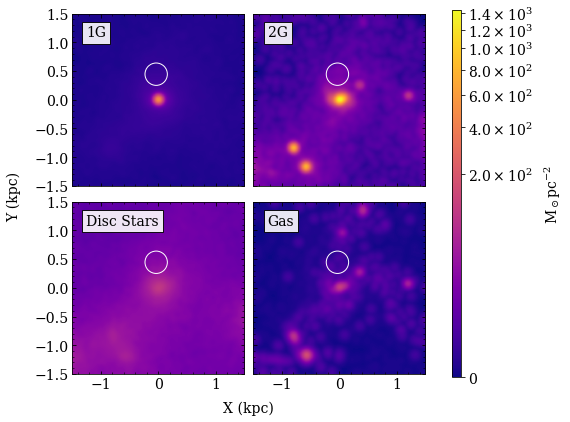

In [16]:
rang = 1500
rang = rang/1000
time_x = -1.25
time_y = 1.1

#cmap = plt.cm.get_cmap('magma_r')
cmap = plt.cm.get_cmap('plasma')


fig = plt.figure()
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1, 0.05, 0.05])  
cbax = plt.subplot(gs[:,3])
ax0 = plt.subplot(gs[1,0]) # bottom left
ax1 = plt.subplot(gs[1,1], sharey=ax0) # bottom right
ax2 = plt.subplot(gs[0,0], sharex=ax0) # top left
ax3 = plt.subplot(gs[0,1], sharex=ax1, sharey=ax2) # top right
fig.set_size_inches(6, 6)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

gamma = 0.3
cmap = plt.cm.get_cmap('plasma')
shading = 'quadric'

gal_max = np.max(gal_hist)
gas_max = np.max(gas_hist)
new_max = np.max(new_hist)
old_max = np.max(old_hist)

all_max = max([gal_max, gas_max, new_max, old_max])

props = dict(facecolor='white',alpha=0.9)  


im = ax0.imshow(gal_hist.T, cmap=cmap, origin='lower', vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax0.scatter(iwas4[0]/1000, iwas4[1]/1000, s=500, facecolors='none', edgecolors='white', zorder=5)
#ax0.set_xlabel("X (pc)")
#ax0.set_ylabel("Y (pc)")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.text(time_x, time_y, 'Disc Stars', bbox=props)

ax1.imshow(gas_hist.T, cmap=cmap, origin='lower', vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax1.scatter(iwas4[0]/1000, iwas4[1]/1000, s=500, facecolors='none', edgecolors='white', zorder=5)
#ax1.set_xlabel("X (pc)")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(time_x, time_y, 'Gas', bbox=props)

ax2.imshow(old_hist.T, cmap=cmap, origin='lower', vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax2.scatter(iwas4[0]/1000, iwas4[1]/1000, s=500, facecolors='none', edgecolors='white', zorder=5)
#ax2.set_ylabel("Y (pc)")
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '1G', bbox=props)


ax3.imshow(new_hist.T, cmap=cmap, origin='lower', vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax3.scatter(iwas4[0]/1000, iwas4[1]/1000, s=500, facecolors='none', edgecolors='white', zorder=5)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '2G', bbox=props)

ax0.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax1.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax2.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax3.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.1, hspace=0.05)   

fig.text(-0.1, 0.5, 'Y (kpc)', va='center', rotation='vertical')
fig.text(0.4, 0.01, 'X (kpc)', va='center')

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
cb.set_label(r'M$_\odot$pc$^{-2}$', labelpad=10)
plt.savefig("time_ev_final_all", bbox_inches='tight', dpi = 300)
plt.show()

In [18]:
rng = 500
bns = 100
area = (2*rng/bns)**2
#rng = 450
#bns = 300
# Calculate histogram bins then use imshow()
# Weighted by mass
#gal_count, xedges, yedges = np.histogram2d(new['y_scale'], new['z_scale'], bins=[bins, bins],range=([-rang,rang],[-rang,rang]), weights=new['mass'])
old_hist, xedges, yedges = np.histogram2d(old.x_scale, old.y_scale, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=old.mass)
new_hist, xedges, yedges = np.histogram2d(new.x_scale, new.y_scale, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=new.mass)
gas_hist, xedges, yedges = np.histogram2d(gas.x_scale, gas.y_scale, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=gas.mass)
gal_hist, xedges, yedges = np.histogram2d(gal.x_scale, gal.y_scale, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=gal.mass)


smoothing_sigma = 1

'''old_hist = gaussian_filter(old_hist, sigma=smoothing_sigma)
new_hist = gaussian_filter(new_hist, sigma=smoothing_sigma)
gas_hist = gaussian_filter(gas_hist, sigma=smoothing_sigma)
gal_hist = gaussian_filter(gal_hist, sigma=smoothing_sigma)'''

'old_hist = gaussian_filter(old_hist, sigma=smoothing_sigma)\nnew_hist = gaussian_filter(new_hist, sigma=smoothing_sigma)\ngas_hist = gaussian_filter(gas_hist, sigma=smoothing_sigma)\ngal_hist = gaussian_filter(gal_hist, sigma=smoothing_sigma)'

In [19]:
gamma = 0.2
cmap = plt.cm.get_cmap('magma')
shading = 'quadric'

gal_max = np.max(gal_hist/area)
gas_max = np.max(gas_hist/area)
new_max = np.max(new_hist/area)
old_max = np.max(old_hist/area)

all_max = max([gal_max, gas_max, new_max, old_max])

In [20]:
print(gal_max, gas_max, new_max, old_max)
(2*rng/bns)**2

136.8 538.5226626 5263.048499999999 1841.8974999999978


100.0

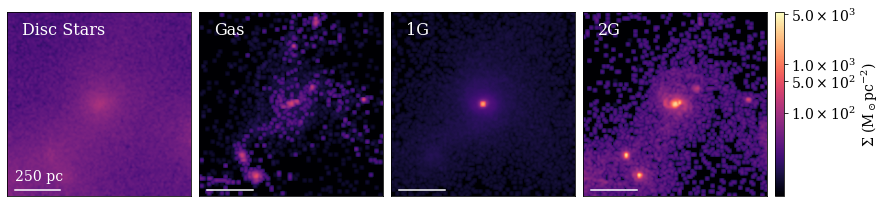

In [10]:
time_x = -420
time_y = 380



fig = plt.figure()
gs = gridspec.GridSpec(1, 5, width_ratios=[1,1,1,1, 0.05])  
cbax = plt.subplot(gs[:,-1])
ax0 = plt.subplot(gs[0,0]) 
ax1 = plt.subplot(gs[0,1]) 
ax2 = plt.subplot(gs[0,2]) 
ax3 = plt.subplot(gs[0,3])
fig.set_size_inches(12,3)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)


im = ax0.imshow(gal_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rng, rng, -rng, rng])
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.text(time_x, time_y, 'Disc Stars', color = 'white', fontsize=16)

ax1.imshow(gas_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rng, rng, -rng, rng])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(time_x, time_y, 'Gas', color = 'white', fontsize=16)

ax2.imshow(old_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rng, rng, -rng, rng])
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '1G', color = 'white', fontsize=16)


ax3.imshow(new_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rng, rng, -rng, rng])
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '2G', color = 'white', fontsize=16)

ax0.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.05, hspace=0.05)   

#fig.text(0.001, 0.5, 'Y (pc)', va='center', rotation='vertical')
#fig.text(0.5, 0.01, 'X', va='center')

ax0.text(-455, -420, '250 pc', c = 'white')
ax0.plot([-460,-210], [-470, -470], color='white')
ax1.plot([-460,-210], [-470, -470], color='white')
ax2.plot([-460,-210], [-470, -470], color='white')
ax3.plot([-460,-210], [-470, -470], color='white')



ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
#ax0.set_ylabel("y")

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt), ticks=[1e2, 5e2, 1e3, 5e3])
#cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
cb.set_label(r'$\Sigma \ (\rm{M}_\odot$pc$^{-2})$')
plt.savefig("time_ev_final_all_long_2_noaxLabel", bbox_inches='tight', dpi = 300)
plt.show()

In [12]:
old = np.load('old.npy')
new = np.load('new.npy')

col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']
old = pd.DataFrame(old, columns=col_header)
new = pd.DataFrame(new, columns=col_header)

old = old.assign(x_scale = old.x - iwas4[0])
old = old.assign(y_scale = old.y - iwas4[1])
old = old.assign(z_scale = old.z - iwas4[2])


new = new.assign(x_scale = new.x - iwas4[0])
new = new.assign(y_scale = new.y - iwas4[1])
new = new.assign(z_scale = new.z - iwas4[2])

In [13]:
i = 30
new_crop = new.loc[(new.y_scale<i)&(new.y_scale>-i)&(new.x_scale<i)&(new.x_scale>-i)&(new.z_scale<i)&(new.z_scale>-i)]
#new_crop = new_crop.assign(r = np.sqrt(new_crop.x_scale**2 + new_crop.y_scale**2 + new_crop.z_scale**2))

old_crop = old.loc[(old.y_scale<i)&(old.y_scale>-i)&(old.x_scale<i)&(old.x_scale>-i)&(old.z_scale<i)&(old.z_scale>-i)]
#old_crop = old_crop.assign(r = np.sqrt(old_crop.x_scale**2 + old_crop.y_scale**2 + old_crop.z_scale**2))

In [22]:
rang = 30

# Calculate histogram bins then use imshow()
# Weighted by mass
#gal_count, xedges, yedges = np.histogram2d(new['y_scale'], new['z_scale'], bins=[bins, bins],range=([-rang,rang],[-rang,rang]), weights=new['mass'])
old_hist_raw, xedges_o, yedges_o = np.histogram2d(old_crop.x_scale, old_crop.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=old_crop.mass)
new_hist_raw, xedges_n, yedges_n = np.histogram2d(new_crop.x_scale, new_crop.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=new_crop.mass)
gas_hist_raw, xedges_gs, yedges_gs = np.histogram2d(new_crop.x_scale, new_crop.z_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=new_crop.mass)
gal_hist_raw, xedges_gl, yedges_gl = np.histogram2d(old_crop.x_scale, old_crop.z_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=old_crop.mass)


gal_max = np.max(old_hist_raw)
gas_max = np.max(new_hist_raw)
new_max = np.max(gas_hist_raw)
old_max = np.max(gal_hist_raw)

all_max = max([gal_max, gas_max, new_max, old_max])



smoothing_sigma = 2

old_hist_cont = gaussian_filter(old_hist_raw, sigma=smoothing_sigma)
new_hist_cont = gaussian_filter(new_hist_raw, sigma=smoothing_sigma)
gas_hist_cont = gaussian_filter(gas_hist_raw, sigma=smoothing_sigma)
gal_hist_cont = gaussian_filter(gal_hist_raw, sigma=smoothing_sigma)

smoothing_sigma = 1

old_hist = gaussian_filter(old_hist_raw, sigma=smoothing_sigma)
new_hist = gaussian_filter(new_hist_raw, sigma=smoothing_sigma)
gas_hist = gaussian_filter(gas_hist_raw, sigma=smoothing_sigma)
gal_hist = gaussian_filter(gal_hist_raw, sigma=smoothing_sigma)

'''old_hist = old_hist_raw
new_hist = new_hist_raw
gas_hist = gas_hist_raw
gal_hist = gal_hist_raw'''



'old_hist = old_hist_raw\nnew_hist = new_hist_raw\ngas_hist = gas_hist_raw\ngal_hist = gal_hist_raw'

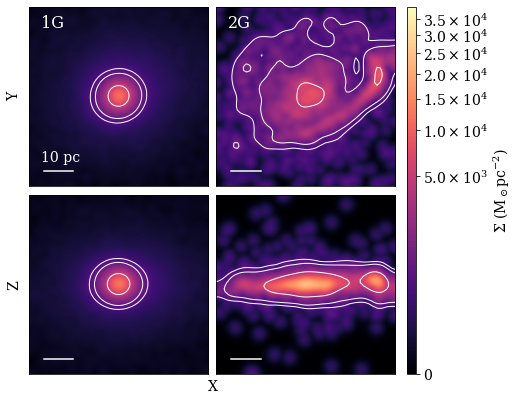

In [15]:
# Location of the Text
time_x = -26
time_y = 23
cmap = plt.cm.get_cmap('magma')


fig = plt.figure()
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1, 0.00001, 0.05])  
cbax = plt.subplot(gs[:,3])
ax0 = plt.subplot(gs[1,0]) # bottom left
ax1 = plt.subplot(gs[1,1], sharey=ax0) # bottom right
ax2 = plt.subplot(gs[0,0], sharex=ax0) # top left
ax3 = plt.subplot(gs[0,1], sharex=ax1, sharey=ax2) # top right
fig.set_size_inches(6, 6)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

gamma = 0.3

shading = 'quadric'


# Plot the contours
mylevels=[5e2,1e3, 5e3]
ax0.contour(gal_hist_cont.transpose(),mylevels,extent=[xedges_gl.min(),xedges_gl.max(),
    yedges_gl.min(),yedges_gl.max()],linewidths=1,colors='white',
    linestyles='solid')

ax1.contour(gas_hist_cont.transpose(),mylevels,extent=[xedges_gs.min(),xedges_gs.max(),
    yedges_gs.min(),yedges_gs.max()],linewidths=1,colors='white',
    linestyles='solid')

ax2.contour(old_hist_cont.transpose(),mylevels,extent=[xedges_o.min(),xedges_o.max(),
    yedges_o.min(),yedges_o.max()],linewidths=1,colors='white',
    linestyles='solid')

ax3.contour(new_hist_cont.transpose(),mylevels,extent=[xedges_n.min(),xedges_n.max(),
    yedges_n.min(),yedges_n.max()],linewidths=1,colors='white',
    linestyles='solid')



im = ax0.imshow(gal_hist.T, cmap=cmap, origin='lower', interpolation = shading, 
                vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax0.set_ylabel("Z")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())


ax1.imshow(gas_hist.T, cmap=cmap, origin='lower',interpolation = shading, 
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax2.imshow(old_hist.T, cmap=cmap, origin='lower', interpolation = shading,
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax2.set_ylabel("Y")
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '1G', color = 'white', fontsize=16)

ax3.imshow(new_hist.T, cmap=cmap, origin='lower', interpolation = shading ,
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '2G', color = 'white', fontsize=16)

ax0.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.05, hspace=0.05)   



ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])


ax2.text(-26, -22, '10 pc', c = 'white')
ax0.plot([-25,-15], [-25, -25], color='white')
ax1.plot([-25,-15], [-25, -25], color='white')
ax2.plot([-25,-15], [-25, -25], color='white')
ax3.plot([-25,-15], [-25, -25], color='white')


fig.text(0.47, 0.05, 'X', va='center')

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
cb.set_label(r'$\Sigma \ (\rm{M}_\odot$pc$^{-2})$')
#plt.savefig("time_ev_final_GC_2", bbox_inches='tight', dpi = 300)
plt.show()

In [16]:
rang = 2000
bin_size = 4000
cmap = plt.cm.get_cmap('magma')
gamma = 0.4
i = 6
hist1, xedges, yedges = np.histogram2d(df_n[i].x, df_n[i].y, bins = bin_size, weights = df_n[i].mass, range=([-rang,rang],[-rang,rang]))
smoothing_sigma = 5
hist1 = gaussian_filter(hist1, sigma=smoothing_sigma) #because of per 100 pc bins
fig, ax1 = plt.subplots()

im2 = ax1.imshow(hist1.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
ax1.plot([-1800,-800], [-1800, -1800], color='white')
cbar = fig.colorbar(im2, ax=ax1, format=ticker.FuncFormatter(fmt))
ax1.text(time_x, time_y, 'New Stars', color='white')
ax1.scatter(max_x[clump_numbers], max_y[clump_numbers], s=200, facecolors='none', edgecolors='white')
#ax1.scatter(max_x, max_y, s=100, facecolors='none', edgecolors='white')
ax1.set_ylabel('Y (pc)')
ax1.set_xlabel('X (pc)')
#ax1.set_title('$\Sigma_{ H_2 }$')
cbar.set_label(r'$\Sigma $    (M$_\odot$ pc$^{-2}$)', labelpad = 10)
plt.axis('off')
cbar.ax.minorticks_on()
ax1.text(-1650, -1700, '1 kpc', c = 'white')
#plt.savefig('new_stars'+ str(i), bbox_inches='tight', dpi = 300)
plt.show()

NameError: name 'df_n' is not defined

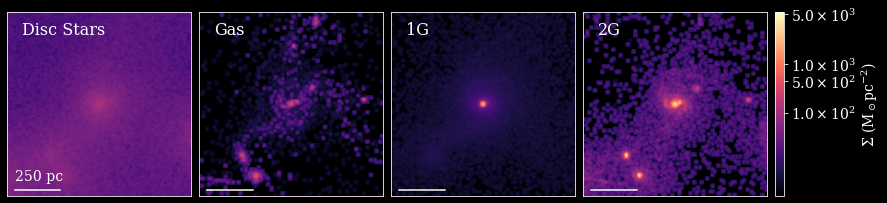

In [21]:
plt.style.use('dark_background')
time_x = -420
time_y = 380



fig = plt.figure()
gs = gridspec.GridSpec(1, 5, width_ratios=[1,1,1,1, 0.05])  
cbax = plt.subplot(gs[:,-1])
ax0 = plt.subplot(gs[0,0]) 
ax1 = plt.subplot(gs[0,1]) 
ax2 = plt.subplot(gs[0,2]) 
ax3 = plt.subplot(gs[0,3])
fig.set_size_inches(12,3)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)


im = ax0.imshow(gal_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rng, rng, -rng, rng])
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.text(time_x, time_y, 'Disc Stars', color = 'white', fontsize=16)

ax1.imshow(gas_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rng, rng, -rng, rng])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(time_x, time_y, 'Gas', color = 'white', fontsize=16)

ax2.imshow(old_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rng, rng, -rng, rng])
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '1G', color = 'white', fontsize=16)


ax3.imshow(new_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rng, rng, -rng, rng])
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '2G', color = 'white', fontsize=16)

ax0.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.05, hspace=0.05)   

#fig.text(0.001, 0.5, 'Y (pc)', va='center', rotation='vertical')
#fig.text(0.5, 0.01, 'X', va='center')

ax0.text(-455, -420, '250 pc', c = 'white')
ax0.plot([-460,-210], [-470, -470], color='white')
ax1.plot([-460,-210], [-470, -470], color='white')
ax2.plot([-460,-210], [-470, -470], color='white')
ax3.plot([-460,-210], [-470, -470], color='white')



ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
#ax0.set_ylabel("y")

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt), ticks=[1e2, 5e2, 1e3, 5e3])
#cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
cb.set_label(r'$\Sigma \ (\rm{M}_\odot$pc$^{-2})$')
plt.savefig("time_ev_final_all_long_2_dark", bbox_inches='tight', dpi = 300)
plt.show()

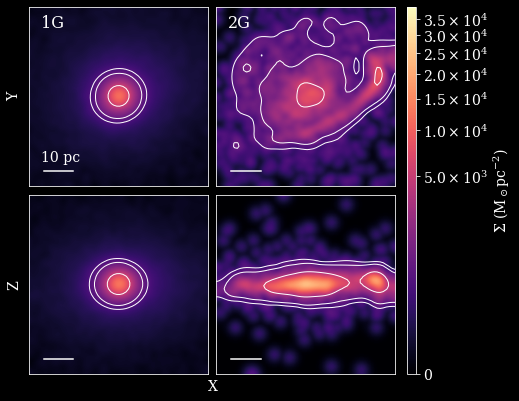

In [23]:
# Location of the Text
time_x = -26
time_y = 23
cmap = plt.cm.get_cmap('magma')


fig = plt.figure()
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1, 0.00001, 0.05])  
cbax = plt.subplot(gs[:,3])
ax0 = plt.subplot(gs[1,0]) # bottom left
ax1 = plt.subplot(gs[1,1], sharey=ax0) # bottom right
ax2 = plt.subplot(gs[0,0], sharex=ax0) # top left
ax3 = plt.subplot(gs[0,1], sharex=ax1, sharey=ax2) # top right
fig.set_size_inches(6, 6)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

gamma = 0.3

shading = 'quadric'


# Plot the contours
mylevels=[5e2,1e3, 5e3]
ax0.contour(gal_hist_cont.transpose(),mylevels,extent=[xedges_gl.min(),xedges_gl.max(),
    yedges_gl.min(),yedges_gl.max()],linewidths=1,colors='white',
    linestyles='solid')

ax1.contour(gas_hist_cont.transpose(),mylevels,extent=[xedges_gs.min(),xedges_gs.max(),
    yedges_gs.min(),yedges_gs.max()],linewidths=1,colors='white',
    linestyles='solid')

ax2.contour(old_hist_cont.transpose(),mylevels,extent=[xedges_o.min(),xedges_o.max(),
    yedges_o.min(),yedges_o.max()],linewidths=1,colors='white',
    linestyles='solid')

ax3.contour(new_hist_cont.transpose(),mylevels,extent=[xedges_n.min(),xedges_n.max(),
    yedges_n.min(),yedges_n.max()],linewidths=1,colors='white',
    linestyles='solid')



im = ax0.imshow(gal_hist.T, cmap=cmap, origin='lower', interpolation = shading, 
                vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax0.set_ylabel("Z")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())


ax1.imshow(gas_hist.T, cmap=cmap, origin='lower',interpolation = shading, 
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax2.imshow(old_hist.T, cmap=cmap, origin='lower', interpolation = shading,
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax2.set_ylabel("Y")
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '1G', color = 'white', fontsize=16)

ax3.imshow(new_hist.T, cmap=cmap, origin='lower', interpolation = shading ,
           vmin=0, vmax=all_max, norm=mcolors.PowerNorm(gamma),  extent=[-rang, rang, -rang, rang])
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '2G', color = 'white', fontsize=16)

ax0.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.05, hspace=0.05)   



ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])


ax2.text(-26, -22, '10 pc', c = 'white')
ax0.plot([-25,-15], [-25, -25], color='white')
ax1.plot([-25,-15], [-25, -25], color='white')
ax2.plot([-25,-15], [-25, -25], color='white')
ax3.plot([-25,-15], [-25, -25], color='white')


fig.text(0.47, 0.05, 'X', va='center')

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
cb.set_label(r'$\Sigma \ (\rm{M}_\odot$pc$^{-2})$')
plt.savefig("time_ev_final_GC_2_dark", bbox_inches='tight', dpi = 300)
plt.show()